# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

This week is a revision of what we covered so far. There is no starter code, you will have to sort your `import` statements.

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Please save the programs that you write to solve the exercises. We may ask you to show us the code and run it to re-generate the results.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 1

[Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law) states that the leading digits of numbers in data set follows a particular distribution, if $d$ is the digit between 1 and 9: $P(d)=log_{10}(1+1/d)$. This is used for fraud detections in many situations.

Try it out with the file [population.csv](https://raw.githubusercontent.com/PX2134/data/master/week5/population.csv), which is the list of states by population from [wikipedia](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population#Sovereign_states_and_dependencies_by_population), converted from the table to a `.csv` file with [wikitable2csv](https://wikitable2csv.ggor.de/). You will need to plot a histogram and have it normalised, I recommend from `matplotlib.pyplot`:
```python
plt.hist(data,bins='auto',density=True)
```

1. [2] Overplot that histogram with Benford's law.
2. [4] Find some data online that covers a range of magnitudes and is in a unit (any unit will do, for instance distances in meters, prices in pounds, etc...) and try to apply Benford's law. Convert the data to another unit (for instance distances in feet, prices in euros, etc...) and apply Benford's law again.

In [1]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week5/population.csv

(array([0.3393595 , 0.16735537, 0.14411157, 0.09762397, 0.13946281,
        0.08832645, 0.0464876 , 0.05113636, 0.05113636]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <a list of 9 Patch objects>)

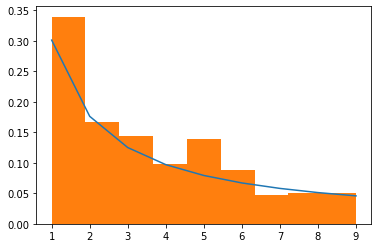

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

f = pd.read_csv(r'population.csv')


pop = f['Population'].to_numpy()
fpop = [int(str(n)[0]) for n in pop]

num = np.array([1,2,3,4,5,6,7,8,9])

def benford_law(d):
  return np.log10(1+1/d)

plt.figure()
plt.plot(num, benford_law(num))
plt.hist(fpop, bins = 'auto', density = True)



TypeError: ignored

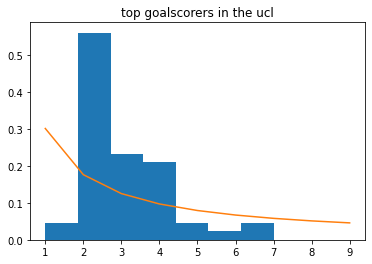

In [3]:
g = pd.read_csv(r'goalscorers.csv')

scorers = g['Goals'].to_numpy()
gscorers = [int(str(n)[0])for n in scorers]

plt.hist(gscorers, bins = 'auto', density = True)
plt.title("top goalscorers in the ucl")

num = np.array([1,2,3,4,5,6,7,8,9])
plt.plot(num, benford_law(num))

'''convert to different units'''
gaols_divided_by_10 = gscorers/10
plt.hist(gaols_divided_by_10, bins = 'auto', density = True)
plt.title("top goalscorers in the ucl divided by 10")


In [ ]:
g.head()

## Exercise 2

We will take a look at the "lighthouse problem". A lighthouse is at a distance `d` from the shore, and shines randomly in all directions. On the shore, we have photodetectors regularly spread looking out to sea. In those conditions, the number of light flashes a detector sees is given by a [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) (also known as Lorentz) distribution.

The file [light_house_a.txt](https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_a.txt) (URL for wget is https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_a.txt) is a record of the count for each detector's position, with the error in that measurement for each detector. All distances are in kilometers. Note: that toy lighthouse seems to be about 5 kilometers from the shore.

1. [1] Plot the data in `light_house_a.txt`, count as a function of detector position. Include the error bars in the plot. _Hint:_ you can use for instance `errorbar()` from `matplotlib.pyplot`:
```python
plt.errorbar(position,count,yerr=sigma_count)
```
2. [2] Define a Cauchy function, which takes the positions of the detector as the variable and appropriate parameters to fit the data. You'll need a location parameter, a scale parameter, and an overall proportionality constant parameter.

3. [1] Plot the data and your Cauchy function on the same graph with some inital guesses for the parameters.

4. [2] Perform `curve_fit` on the data with your Cauchy function, ignoring for now the errors in the detector measurements (the sigma_count column).

5. [4] Now perform the same fit but with the errors, which you feed to `curve_fit()` with:
```python
curve_fit(cauchy, position, count, sigma=sigma_count,absolute_sigma=True)
```
`curve_fit` downweights the data points with a large error: comment on the difference between the two fits.

6. [4] Far off in the distance (so we don't have photodectors there) there's another lighthouse. Perform the same operations as above with [light_house_b.txt](https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_b.txt). The fit will only include the data in the tail of the Cauchy distribution ...

In [4]:
from scipy.optimize import curve_fit

In [5]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_a.txt

loc:  8.544115868425534 +/- 0.48250025683567055
scale:  8.544115868425534 +/- 0.7027189311033728
h:  32.76842506624316 +/- 6.3149392968939315
loc:  8.882992902818797 +/- 0.4626544050546629
scale:  8.882992902818797 +/- 0.671266432543605
h:  33.00213608478288 +/- 5.867285246896311


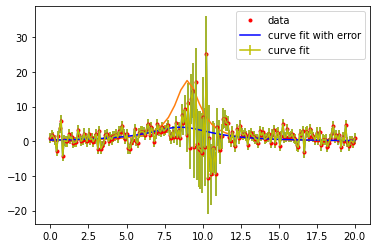

In [6]:
#part 1 
lighthouse = np.loadtxt('light_house_a.txt', unpack = 'true', skiprows=1)
position=np.array(lighthouse[0])
count=np.array(lighthouse[1])
sigma_count=np.array(lighthouse[2])
plt.errorbar(position,count,yerr=sigma_count)

#defining cauchy part 2
def Cauchy(position, location, scale, h):
  return h/(np.pi*scale*(1+((position-location)/scale)**2))
x = np.linspace(min(position), max(position),)

# part 3 plotting cauchy 
plt.plot(x,Cauchy(x, 9, 1, 55))

#part 4 performing curve fit 
p_guess = np.array([9, 3, 32])
popt, pcov = curve_fit(Cauchy, position, count, p_guess)
yfit = Cauchy(x, *popt)

#plot data
plt.plot(position, count, 'r.', label='data')
#plot fit
plt.plot(x, yfit, 'b-', label ='curve fit with error')
print('loc: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0]))
print('scale: ',popt[0], '+/-', np.sqrt(pcov.diagonal()[1]))
print('h: ',popt[2], '+/-', np.sqrt(pcov.diagonal()[2]))
plt.legend()

#part 5 plot with error 
def cauchy(position, loc, scale, h, sigma):
  return h/(np.pi*scale*(1+((position-loc)/scale)**2))+sigma*position
popt, pcov = curve_fit(cauchy, position, count, sigma=sigma_count,absolute_sigma=True)
yfit = cauchy(x, *popt)

# plot fit
plt.errorbar(position, count, yerr=sigma_count, color='y', label='curve fit')
print('loc: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0]))
print('scale: ',popt[0], '+/-', np.sqrt(pcov.diagonal()[1]))
print('h: ',popt[2], '+/-', np.sqrt(pcov.diagonal()[2]))
plt.legend()


In [ ]:
# part 6 ! 

In [8]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_b.txt

loc:  21.699749846011695 +/- 0.7610818002602642
scale:  21.699749846011695 +/- 0.24871815364198113
h:  55.10456909381671 +/- 6.218601245927722
loc:  0.1633132232604115 +/- 0.06634500004284798
scale:  0.1633132232604115 +/- 0.10612546405971648
h:  0.3893529354887542 +/- 0.13902783554528517


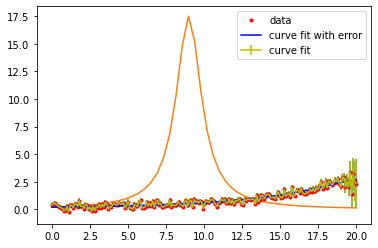

In [11]:
#part 1 
lighthouse = np.loadtxt('light_house_b.txt', unpack = 'true', skiprows=1)
position2=np.array(lighthouse[0])
count2=np.array(lighthouse[1])
sigma_count2=np.array(lighthouse[2])
plt.errorbar(position2,count2,yerr=sigma_count2)

#defining cauchy part 2
def Cauchy(position, location, scale, h):
  return h/(np.pi*scale*(1+((position-location)/scale)**2))
x = np.linspace(min(position), max(position),)

# part 3 plotting cauchy 
plt.plot(x,Cauchy(x, 9, 1, 55))

#part 4 performing curve fit 
p_guess = np.array([9, 3, 32])
popt, pcov = curve_fit(Cauchy, position2, count2, p_guess)
yfit = Cauchy(x, *popt)

#plot data
plt.plot(position2, count2, 'r.', label='data')
#plot fit
plt.plot(x, yfit, 'b-', label ='curve fit with error')
print('loc: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0]))
print('scale: ',popt[0], '+/-', np.sqrt(pcov.diagonal()[1]))
print('h: ',popt[2], '+/-', np.sqrt(pcov.diagonal()[2]))
plt.legend()

#part 5 plot with error 
def cauchy(position, loc, scale, h, sigma):
  return h/(np.pi*scale*(1+((position-loc)/scale)**2))+sigma*position
popt, pcov = curve_fit(cauchy, position2, count2, sigma=sigma_count2,absolute_sigma=True)
yfit = cauchy(x, *popt)

# plot fit
plt.errorbar(position2, count2, yerr=sigma_count2, color='y', label='curve fit')
print('loc: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0]))
print('scale: ',popt[0], '+/-', np.sqrt(pcov.diagonal()[1]))
print('h: ',popt[2], '+/-', np.sqrt(pcov.diagonal()[2]))
plt.legend()